In [1]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from multiprocessing import Process
from eeg_clean import clean, epoch_stats
from data_quality import ica_score
from plotting.templates import plot_dens_scatter, plot_n_boxplots

First Analysis of how quasi thresholding does on its own

In [2]:
epi_quasi_ec_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\epi_data\results_run_2_extended\0\quasi")
epi_quasi_eo_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\epi_data\results_run_2_extended\1\quasi")

In [3]:
epi_quasi_ec_results = np.zeros(
    (   
        16,
        2,
        4,
        5
    )
)

In [4]:
epi_quasi_eo_results = np.zeros(
    (   
        16,
        2,
        4,
        5
    )
)

In [5]:
for i, pth in enumerate(epi_quasi_ec_folder.iterdir()):
    current = np.load(pth)
    epi_quasi_ec_results[i, :, :, :] = current.copy()

In [6]:
for i, pth in enumerate(epi_quasi_eo_folder.iterdir()):
    current = np.load(pth)
    epi_quasi_eo_results[i, :, :, :] = current.copy()

In [7]:
epi_quasi_results = epi_quasi_ec_results.__add__(epi_quasi_eo_results)/2

In [8]:
wang_quasi_ec_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\yulin_wang\results_run_2\0\quasi")
wang_quasi_eo_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\yulin_wang\results_run_2\1\quasi")

In [9]:
wang_quasi_ec_results = np.zeros(
    (   
        16,
        2,
        4,
        5
    )
)

In [10]:
wang_quasi_eo_results = np.zeros(
    (   
        16,
        2,
        4,
        5
    )
)

In [11]:
for i, pth in enumerate(wang_quasi_ec_folder.iterdir()):
    current = np.load(pth)
    wang_quasi_ec_results[i, :, :, :] = current.copy()

In [12]:
for i, pth in enumerate(wang_quasi_eo_folder.iterdir()):
    current = np.load(pth)
    wang_quasi_eo_results[i, :, :, :] = current.copy()

In [13]:
wang_quasi_results = wang_quasi_ec_results.__add__(wang_quasi_eo_results)/2

In [14]:
srm_quasi_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\srm_data\results_run_2_extended\quasi")

In [15]:
srm_quasi_results = np.zeros(
    (   
        16,
        2,
        4,
        5
    )
)

In [16]:
for i, pth in enumerate(srm_quasi_folder.iterdir()):
    current = np.load(pth)
    srm_quasi_results[i, :, :, :] = current.copy()

In [17]:
spis_quasi_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\SPIS-Resting-State-Dataset\results_run_2_extended\quasi")

In [18]:
spis_quasi_results = np.zeros(
    (   
        16,
        2,
        4,
        5
    )
)

In [19]:
for i, pth in enumerate(spis_quasi_folder.iterdir()):
    current = np.load(pth)
    spis_quasi_results[i, :, :, :] = current.copy()

In [20]:
quasi_results = np.zeros(
    (   
        64,
        2,
        4,
        5
    )
)

In [21]:
quasi_results[0:16, :, :, :] = epi_quasi_results
quasi_results[16:32, :, :, :] = srm_quasi_results
quasi_results[32:48, :, :, :] = spis_quasi_results
quasi_results[48:64, :, :, :] = wang_quasi_results

In [22]:
print(np.argwhere(np.isnan(quasi_results)))
print(np.argwhere(np.isinf(quasi_results)))

[[10  0  0  1]
 [10  0  0  2]
 [10  0  0  3]
 [10  0  0  4]
 [22  0  0  1]
 [22  0  0  2]
 [22  0  0  3]
 [22  0  0  4]
 [32  0  0  1]
 [32  0  0  2]
 [32  0  0  3]
 [32  0  0  4]
 [32  1  0  1]
 [32  1  0  2]
 [32  1  0  3]
 [32  1  0  4]
 [33  0  0  1]
 [33  0  0  2]
 [33  0  0  3]
 [33  0  0  4]
 [33  1  0  1]
 [33  1  0  2]
 [33  1  0  3]
 [33  1  0  4]
 [34  0  0  1]
 [34  0  0  2]
 [34  0  0  3]
 [34  0  0  4]
 [34  1  0  1]
 [34  1  0  2]
 [34  1  0  3]
 [34  1  0  4]
 [35  0  0  1]
 [35  0  0  2]
 [35  0  0  3]
 [35  0  0  4]
 [35  1  0  1]
 [35  1  0  2]
 [35  1  0  3]
 [35  1  0  4]
 [36  0  0  1]
 [36  0  0  2]
 [36  0  0  3]
 [36  0  0  4]
 [36  1  0  1]
 [36  1  0  2]
 [36  1  0  3]
 [36  1  0  4]
 [37  0  0  1]
 [37  0  0  2]
 [37  0  0  3]
 [37  0  0  4]
 [37  1  0  1]
 [37  1  0  2]
 [37  1  0  3]
 [37  1  0  4]
 [38  0  0  1]
 [38  0  0  2]
 [38  0  0  3]
 [38  0  0  4]
 [38  1  0  1]
 [38  1  0  2]
 [38  1  0  3]
 [38  1  0  4]
 [39  0  0  1]
 [39  0  0  2]
 [39  0  0

In [23]:
print(np.unravel_index(np.argmax(np.mean(quasi_results[:, :, :, 0], 0)), (2, 4)))
print(np.unravel_index(np.argmax(np.mean(quasi_results[:, :, :, 1], 0)), (2, 4)))
print(np.unravel_index(np.argmax(np.mean(quasi_results[:, :, :, 2], 0)), (2, 4)))
print(np.unravel_index(np.argmax(np.mean(quasi_results[:, :, :, 3], 0)), (2, 4)))
print(np.unravel_index(np.argmax(np.mean(quasi_results[:, :, :, 4], 0)), (2, 4)))

(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)


In [24]:
#best median
print(np.unravel_index(np.argmax(np.median(quasi_results[:, :, :, 0], 0)), (2, 4)))
print(np.unravel_index(np.argmax(np.median(quasi_results[:, :, :, 1], 0)), (2, 4)))
print(np.unravel_index(np.argmax(np.median(quasi_results[:, :, :, 2], 0)), (2, 4)))
print(np.unravel_index(np.argmax(np.median(quasi_results[:, :, :, 3], 0)), (2, 4)))
print(np.unravel_index(np.argmax(np.median(quasi_results[:, :, :, 4], 0)), (2, 4)))

(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)


Investigating the statisitcs of itteration maximazing the average number of braincomponents.

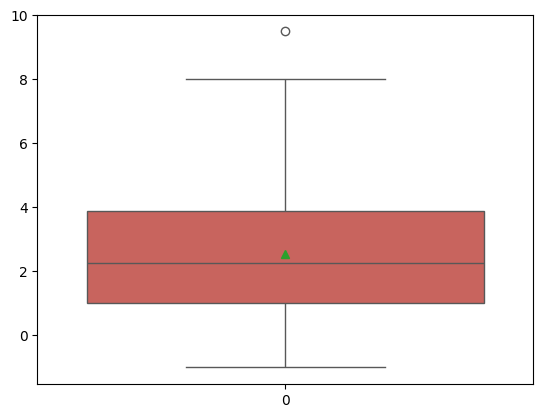

In [25]:
plot_n_boxplots([quasi_results[:, 0, 0, 1].flatten()], [sns.xkcd_rgb["pale red"]])

Compared to the other thresholds

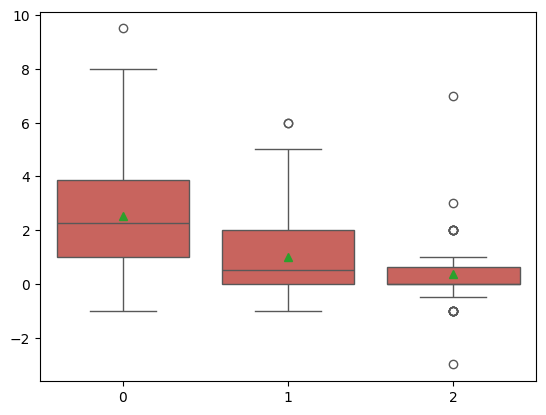

In [26]:
plot_n_boxplots([quasi_results[:, 0, 0, 1].flatten(), quasi_results[:, 0, 1, 1].flatten(), quasi_results[:, 0, 2, 1].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Compared to median

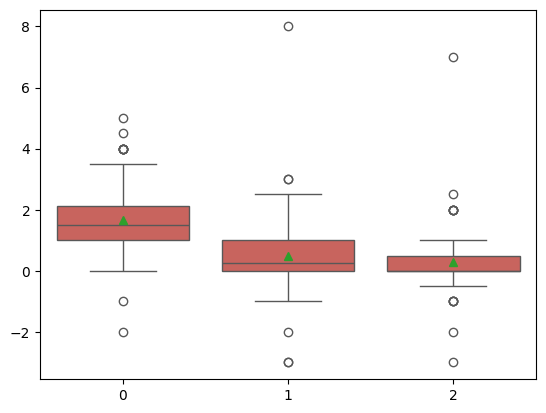

In [27]:
plot_n_boxplots([quasi_results[:, 1, 0, 1].flatten(), quasi_results[:, 1, 1, 1].flatten(), quasi_results[:, 1, 2, 1].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

More stats for the best one.

In [28]:
print(quasi_results[:, 0, 0, 1].flatten())

[ 4.   4.   4.5  0.5  9.5  3.   1.   6.5  1.   1.5  nan  4.   4.5  3.5
  2.5  0.   3.   8.   5.   1.   3.   2.   nan  5.   0.   1.   2.   3.
  0.   3.   1.   4.   nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  1.   0.5  2.5  0.5 -1.   4.5  1.   3.5
  2.   0.   3.5  0.5  2.   3.   1.5  0.5]


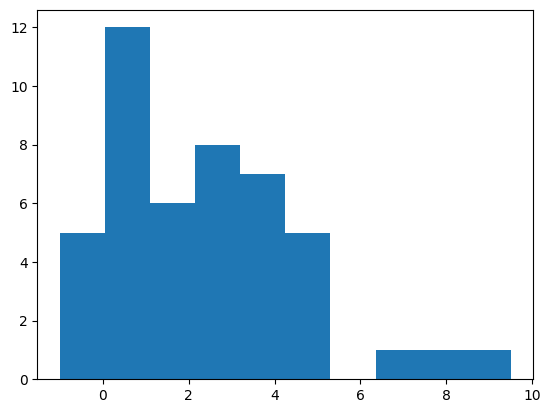

In [29]:
plt.hist(quasi_results[:, 0, 0, 1])
plt.show()

In [30]:
t_statistic, p_value = stats.ttest_1samp(a=quasi_results[:, 0, 0, 1], popmean=0) 
print(t_statistic , p_value)

nan nan


Investigating the statisitcs of itteration maximazing the average number of biological components.

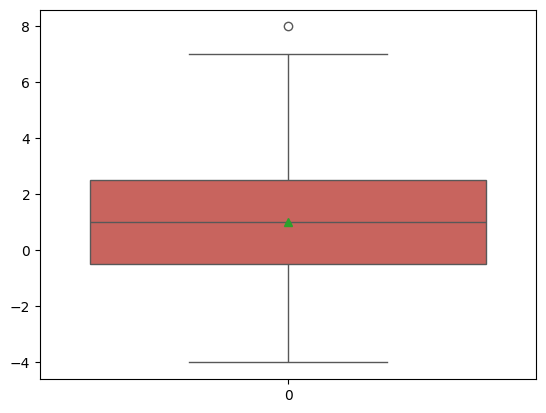

In [31]:
plot_n_boxplots([quasi_results[:, 0, 0, 2].flatten()], [sns.xkcd_rgb["pale red"]])

Compared to the other thresholds

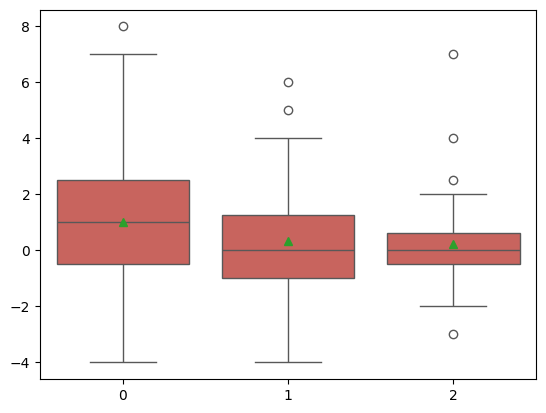

In [32]:
plot_n_boxplots([quasi_results[:, 0, 0, 2].flatten(), quasi_results[:, 0, 1, 2].flatten(), quasi_results[:, 0, 2, 2].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Compared to median

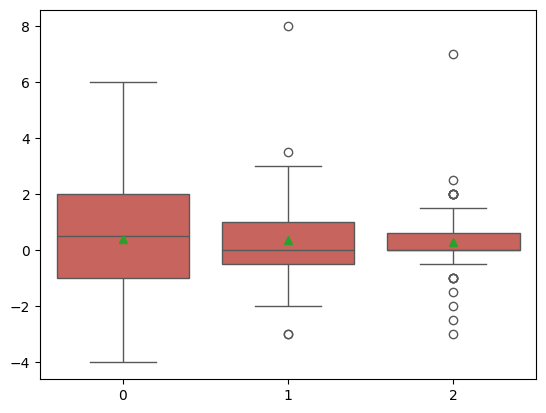

In [33]:
plot_n_boxplots([quasi_results[:, 1, 0, 2].flatten(), quasi_results[:, 1, 1, 2].flatten(), quasi_results[:, 1, 2, 2].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

More stats for the best one.

In [34]:
print(quasi_results[:, 0, 0, 2].flatten())

[ 1.   1.5  1.5 -2.5  8.   2.5  0.5  3.  -1.  -2.   nan  2.5  3.5  0.
 -1.5 -2.   0.   7.   5.  -1.   2.   2.   nan  4.  -2.   1.   1.   2.
  0.   4.   1.   4.   nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan -2.5  1.5  1.5  1.  -3.5  3.  -0.5  4.
 -0.5 -0.5  3.  -4.   1.5 -0.5  0.  -2. ]


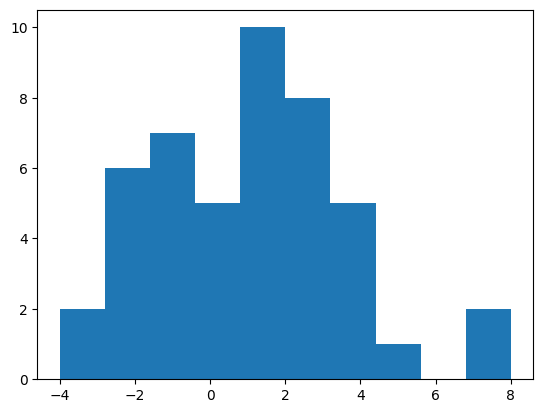

In [35]:
plt.hist(quasi_results[:, 0, 0, 2])
plt.show()

In [31]:
t_statistic, p_value = stats.ttest_1samp(a=quasi_results[:, 1, 0, 2], popmean=0) 
print(t_statistic , p_value)

1.2713107750103814 0.2098738428285435


Then Analysis of how peaks thresholding does on its own

In [36]:
epi_peak_ec_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\epi_data\results_run_2_extended\0\peak")
epi_peak_eo_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\epi_data\results_run_2_extended\1\peak")

In [37]:
epi_peak_ec_results = np.zeros(
    (   
        16,
        2,
        4,
        5
    )
)

In [38]:
epi_peak_eo_results = np.zeros(
    (   
        16,
        2,
        4,
        5
    )
)

In [39]:
for i, pth in enumerate(epi_peak_ec_folder.iterdir()):
    current = np.load(pth)
    epi_peak_ec_results[i, :, :, :] = current.copy()

In [40]:
for i, pth in enumerate(epi_peak_eo_folder.iterdir()):
    current = np.load(pth)
    epi_peak_eo_results[i, :, :, :] = current.copy()

In [41]:
epi_peak_results = epi_peak_ec_results.__add__(epi_peak_eo_results)/2

In [42]:
wang_peak_ec_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\yulin_wang\results_run_2\0\peak")
wang_peak_eo_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\yulin_wang\results_run_2\1\peak")

In [43]:
wang_peak_ec_results = np.zeros(
    (   
        16,
        2,
        4,
        5
    )
)

In [44]:
wang_peak_eo_results = np.zeros(
    (   
        16,
        2,
        4,
        5
    )
)

In [45]:
for i, pth in enumerate(wang_peak_ec_folder.iterdir()):
    current = np.load(pth)
    wang_peak_ec_results[i, :, :, :] = current.copy()

In [46]:
for i, pth in enumerate(wang_peak_eo_folder.iterdir()):
    current = np.load(pth)
    wang_peak_eo_results[i, :, :, :] = current.copy()

In [47]:
wang_peak_results = wang_peak_ec_results.__add__(wang_peak_eo_results)/2

In [48]:
srm_peak_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\srm_data\results_run_2_extended\peak")

In [49]:
srm_peak_results = np.zeros(
    (   
        16,
        2,
        4,
        5
    )
)

In [50]:
for i, pth in enumerate(srm_peak_folder.iterdir()):
    current = np.load(pth)
    srm_peak_results[i, :, :, :] = current.copy()

In [51]:
spis_peak_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\SPIS-Resting-State-Dataset\results_run_2_extended\peak")

In [52]:
spis_peak_results = np.zeros(
    (   
        16,
        2,
        4,
        5
    )
)

In [53]:
for i, pth in enumerate(spis_peak_folder.iterdir()):
    current = np.load(pth)
    spis_peak_results[i, :, :, :] = current.copy()

In [54]:
peak_results = np.zeros(
    (   
        64,
        2,
        4,
        5
    )
)

In [55]:
peak_results[0:16, :, :, :] = epi_peak_results
peak_results[16:32, :, :, :] = srm_peak_results
peak_results[32:48, :, :, :] = spis_peak_results
peak_results[48:64, :, :, :] = wang_peak_results

In [56]:
print(np.argwhere(np.isnan(peak_results)))
print(np.argwhere(np.isnan(peak_results)))

[]
[]


In [57]:
print(np.unravel_index(np.argmax(np.mean(peak_results[:, :, :, 0], 0)), (2, 4)))
print(np.unravel_index(np.argmax(np.mean(peak_results[:, :, :, 1], 0)), (2, 4)))
print(np.unravel_index(np.argmax(np.mean(peak_results[:, :, :, 2], 0)), (2, 4)))
print(np.unravel_index(np.argmax(np.mean(peak_results[:, :, :, 3], 0)), (2, 4)))
print(np.unravel_index(np.argmax(np.mean(peak_results[:, :, :, 4], 0)), (2, 4)))

(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)


In [58]:
#best median
print(np.unravel_index(np.argmax(np.median(peak_results[:, :, :, 0], 0)), (2, 4)))
print(np.unravel_index(np.argmax(np.median(peak_results[:, :, :, 1], 0)), (2, 4)))
print(np.unravel_index(np.argmax(np.median(peak_results[:, :, :, 2], 0)), (2, 4)))
print(np.unravel_index(np.argmax(np.median(peak_results[:, :, :, 3], 0)), (2, 4)))
print(np.unravel_index(np.argmax(np.median(peak_results[:, :, :, 4], 0)), (2, 4)))

(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)


Investigating the statisitcs of itteration maximazing the average number of braincomponents.

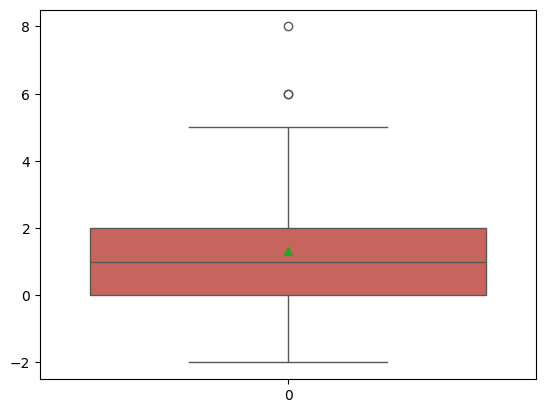

In [59]:
plot_n_boxplots([peak_results[:, 0, 0, 1].flatten()], [sns.xkcd_rgb["pale red"]])

Compared to the other thresholds

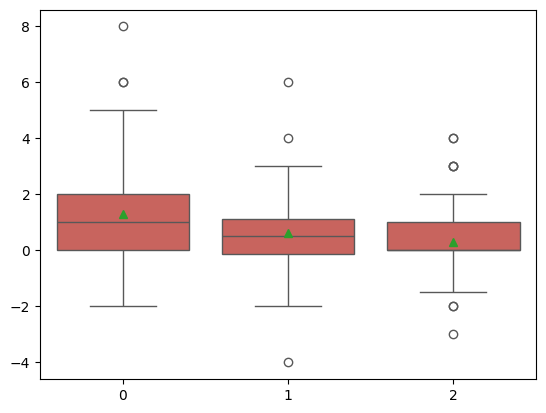

In [60]:
plot_n_boxplots([peak_results[:, 0, 0, 1].flatten(), peak_results[:, 0, 1, 1].flatten(), peak_results[:, 0, 2, 1].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Compared to median

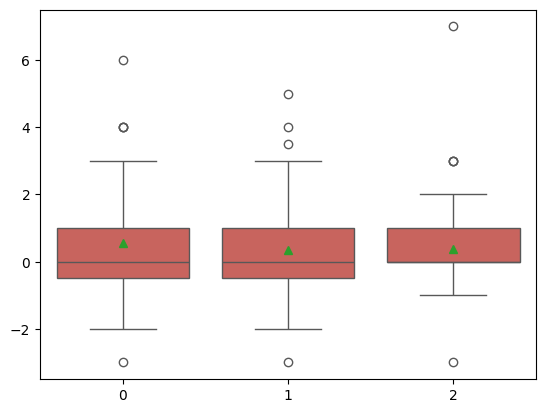

In [61]:
plot_n_boxplots([peak_results[:, 1, 0, 1].flatten(), peak_results[:, 1, 1, 1].flatten(), peak_results[:, 1, 2, 1].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

More stats for the best one.

In [63]:
print(peak_results[:, 0, 0, 1].flatten())

[ 2.5  2.   0.  -2.   4.5  0.5  1.   1.5 -1.   0.5  1.   2.   0.5  3.
 -1.   2.   4.   2.   6.   0.   2.   2.   3.   2.   3.   0.   5.   0.
  0.   8.   0.   4.  -1.   0.   2.   1.   3.   6.   2.   2.  -1.   0.
  2.   1.   0.   1.   2.   0.  -1.   1.5  0.  -0.5 -0.5  2.   1.   2.
  1.  -1.   2.   0.  -1.5  1.5  0.5 -0.5]


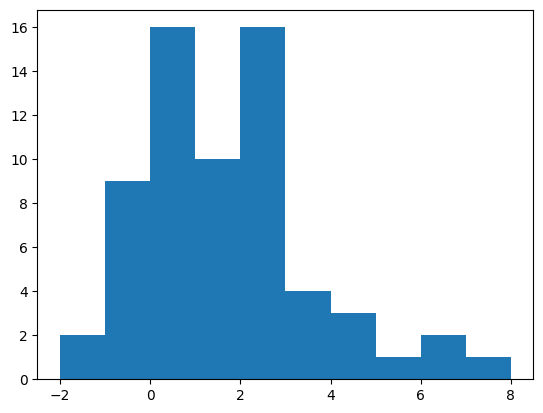

In [62]:
plt.hist(peak_results[:, 0, 0, 1])
plt.show()

In [64]:
t_statistic, p_value = stats.ttest_1samp(a=peak_results[:, 0, 0, 1], popmean=0) 
print(t_statistic , p_value)

5.5079419714631666 7.14687628265074e-07


Investigating the statisitcs of itteration maximazing the average number of biological components.

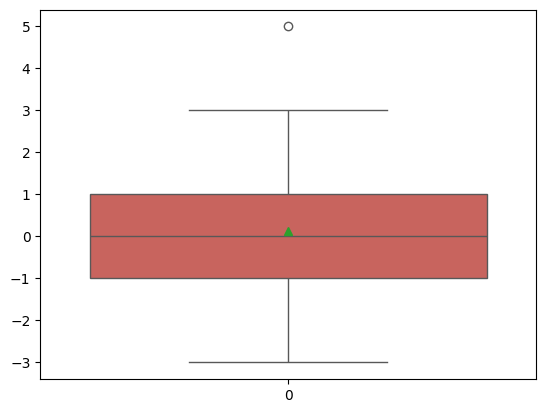

In [65]:
plot_n_boxplots([peak_results[:, 1, 1, 2].flatten()], [sns.xkcd_rgb["pale red"]])

Compared to the other thresholds

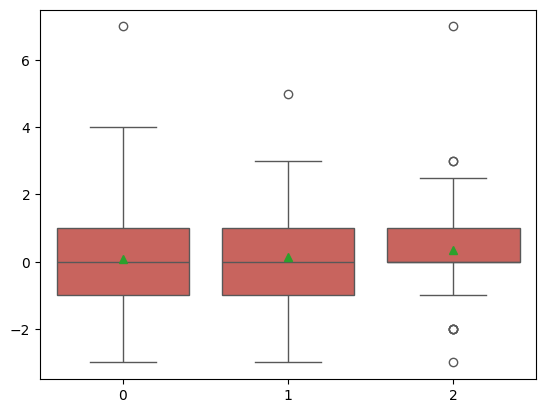

In [66]:
plot_n_boxplots([peak_results[:, 1, 0, 2].flatten(), peak_results[:, 1, 1, 2].flatten(), peak_results[:, 1, 2, 2].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Compared to mean

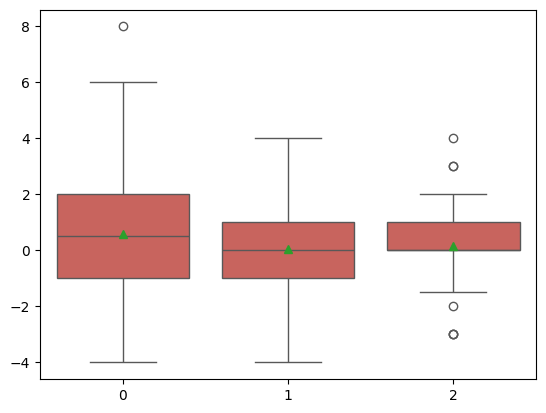

In [67]:
plot_n_boxplots([peak_results[:, 0, 0, 2].flatten(), peak_results[:, 0, 1, 2].flatten(), peak_results[:, 0, 2, 2].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

More stats for the best one.

In [68]:
print(peak_results[:, 1, 1, 2].flatten())

[-1.   0.   1.   1.5  1.5  1.   1.  -0.5 -1.5 -2.  -1.   2.5 -0.5  5.
  1.   0.  -3.   0.   2.   1.   0.   0.   2.   0.   1.  -3.  -2.  -1.
  0.   2.   1.   3.  -1.   0.   0.   1.   0.   1.   1.   0.  -2.  -1.
  0.   3.   0.  -1.   0.  -1.  -1.5  0.   0.5 -1.5  0.   0.  -2.5 -0.5
  2.  -2.   0.5  1.   0.   2.   0.  -1. ]


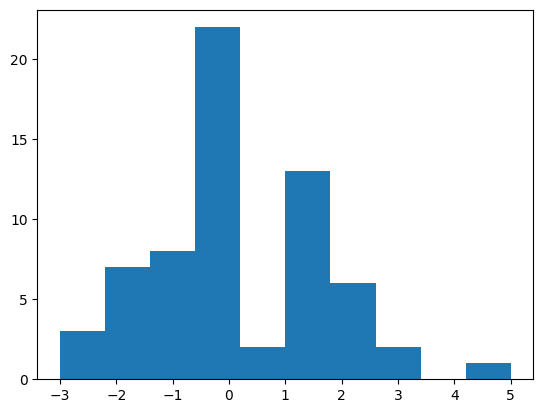

In [69]:
plt.hist(peak_results[:, 1, 1, 2])
plt.show()

In [58]:
t_statistic, p_value = stats.ttest_1samp(a=peak_results[:, 1, 1, 2], popmean=0) 
print(t_statistic , p_value)

1.930944924137912 0.059534137935044855


Then comined!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [70]:
epi_combined_ec_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\epi_data\results_run_2_extended\0\combined")
epi_combined_eo_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\epi_data\results_run_2_extended\1\combined")

In [71]:
epi_combined_ec_results = np.zeros(
    (   
        16,
        2,
        4,
        2,
        4,
        5
    )
)

In [72]:
epi_combined_eo_results = np.zeros(
    (   
        16,
        2,
        4,
        2,
        4,
        5
    )
)

In [73]:
for i, pth in enumerate(epi_combined_ec_folder.iterdir()):
    current = np.load(pth)
    epi_combined_ec_results[i, :, :, :, :, :] = current.copy()

In [74]:
for i, pth in enumerate(epi_combined_eo_folder.iterdir()):
    current = np.load(pth)
    epi_combined_eo_results[i, :, :, :, :, :] = current.copy()

In [75]:
epi_combined_results = epi_combined_ec_results.__add__(epi_combined_ec_results)/2

In [76]:
wang_combined_ec_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\yulin_wang\results_run_2\0\combined")
wang_combined_eo_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\yulin_wang\results_run_2\1\combined")

In [77]:
wang_combined_ec_results = np.zeros(
    (   
        16,
        2,
        4,
        2,
        4,
        5
    )
)

In [78]:
wang_combined_eo_results = np.zeros(
    (   
        16,
        2,
        4,
        2,
        4,
        5
    )
)

In [79]:
for i, pth in enumerate(wang_combined_ec_folder.iterdir()):
    current = np.load(pth)
    wang_combined_ec_results[i, :, :, :, :, :] = current.copy()

In [80]:
for i, pth in enumerate(wang_combined_eo_folder.iterdir()):
    current = np.load(pth)
    wang_combined_eo_results[i, :, :, :, :, :] = current.copy()

In [81]:
wang_combined_results = wang_combined_ec_results.__add__(wang_combined_eo_results)/2

In [82]:
srm_combined_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\srm_data\results_run_2_extended\combined")

In [83]:
srm_combined_results = np.zeros(
    (   
        16,
        2,
        4,
        2,
        4,
        5
    )
)

In [84]:
for i, pth in enumerate(srm_combined_folder.iterdir()):
    current = np.load(pth)
    srm_combined_results[i, :, :, :, :, :] = current.copy()

In [85]:
spis_combined_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\SPIS-Resting-State-Dataset\results_run_2_extended\combined")

In [86]:
spis_combined_results = np.zeros(
    (   
        16,
        2,
        4,
        2,
        4,
        5
    )
)

In [87]:
for i, pth in enumerate(spis_combined_folder.iterdir()):
    current = np.load(pth)
    spis_combined_results[i, :, :, :, :, :] = current.copy()

In [97]:
combined_results = np.zeros(
    (   
        64,
        2,
        3,
        2,
        4,
        5
    )
)

In [98]:
combined_results[0:16, :, :, :] = epi_combined_results[:, :, 1:, :, :, :]
combined_results[16:32, :, :, :] = srm_combined_results[:, :, 1:, :, :, :]
combined_results[32:48, :, :, :] = spis_combined_results[:, :, 1:, :, :, :]
combined_results[48:64, :, :, :] = wang_combined_results[:, :, 1:, :, :, :]

In [103]:
combined_results[:, :, :, :, :, 2] -= combined_results[:, :, :, :, :, 1]


In [106]:
for i in np.argwhere(np.isnan(combined_results)):
    print(i)
print(np.argwhere(np.isinf(combined_results)))

[]


In [125]:
print(np.unravel_index(np.argmax(np.mean(combined_results[:, :, :, :, :, 0], 0)), (2, 4, 2, 4)))
print(np.unravel_index(np.argmax(np.mean(combined_results[:, :, :, :, :, 1], 0)), (2, 4, 2, 4)))
print(np.unravel_index(np.argmax(np.mean(combined_results[:, :, :, :, :, 2], 0)), (2, 4, 2, 4)))
print(np.unravel_index(np.argmax(np.mean(combined_results[:, :, :, :, :, 3], 0)), (2, 4, 2, 4)))
print(np.unravel_index(np.argmax(np.mean(combined_results[:, :, :, :, :, 4], 0)), (2, 4, 2, 4)))

(0, 0, 0, 0)
(0, 0, 0, 0)
(1, 0, 1, 3)
(0, 0, 0, 0)
(0, 0, 0, 0)


In [124]:
#best median
print(np.unravel_index(np.argmax(np.median(combined_results[:, :, :, :, :, 0], 0)), (2, 4, 2, 4)))
print(np.unravel_index(np.argmax(np.median(combined_results[:, :, :, :, :, 1], 0)), (2, 4, 2, 4)))
print(np.unravel_index(np.argmax(np.median(combined_results[:, :, :, :, :, 2], 0)), (2, 4, 2, 4)))
print(np.unravel_index(np.argmax(np.median(combined_results[:, :, :, :, :, 3], 0)), (2, 4, 2, 4)))
print(np.unravel_index(np.argmax(np.median(combined_results[:, :, :, :, :, 4], 0)), (2, 4, 2, 4)))

(0, 0, 0, 0)
(0, 0, 0, 0)
(0, 0, 1, 2)
(0, 0, 0, 0)
(0, 0, 0, 0)


Investigating the statisitcs of itteration maximazing the average number of braincomponents.

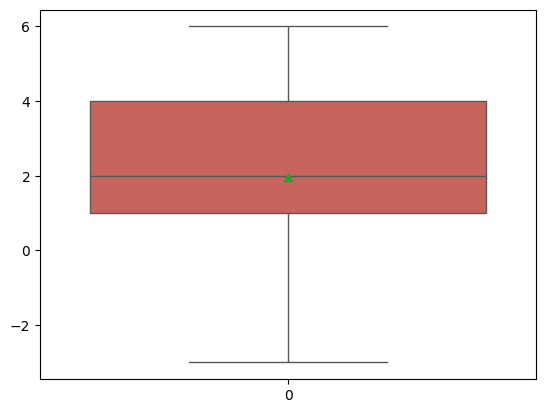

In [109]:
plot_n_boxplots([combined_results[:, 0, 0, 0, 0, 1].flatten()], [sns.xkcd_rgb["pale red"]])

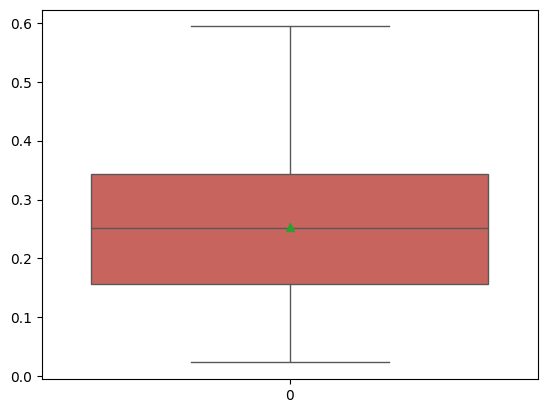

In [112]:
plot_n_boxplots([combined_results[:, 0, 0, 0, 0, 0].flatten()], [sns.xkcd_rgb["pale red"]])

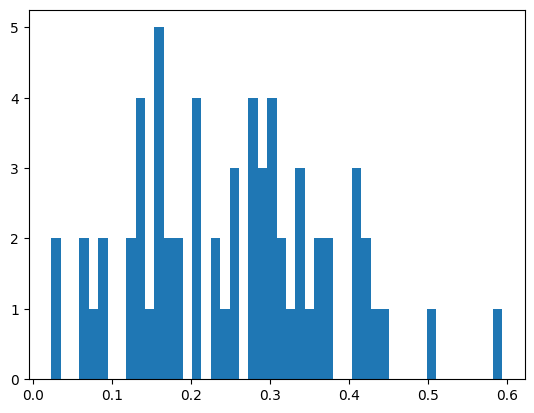

In [113]:
plt.hist(combined_results[:, 0, 0, 0, 0, 0].flatten(), bins=48)
plt.show()

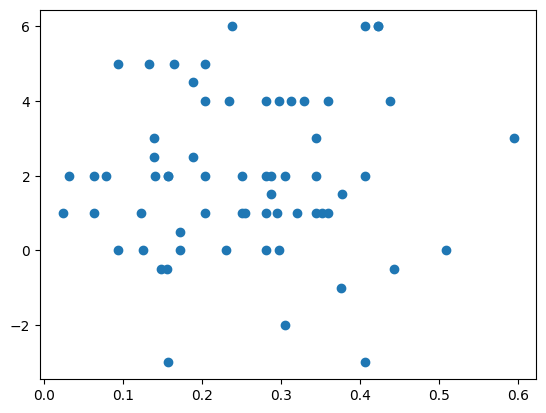

In [115]:
plt.scatter(combined_results[:, 0, 0, 0, 0, 0], combined_results[:, 0, 0, 0, 0, 1])
plt.show()

Compared to the other thresholds

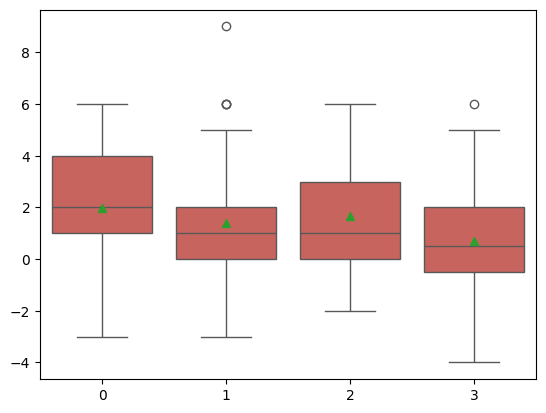

In [116]:
plot_n_boxplots([combined_results[:, 0, 0, 0, 0, 1], combined_results[:, 0, 1, 0, 0, 1], combined_results[:, 0, 0, 0, 1, 1], combined_results[:, 0, 1, 0, 1, 1]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

All mean.. The lower peaks threshold gives a better median, but mean stays the same and spred is higher.
all median?

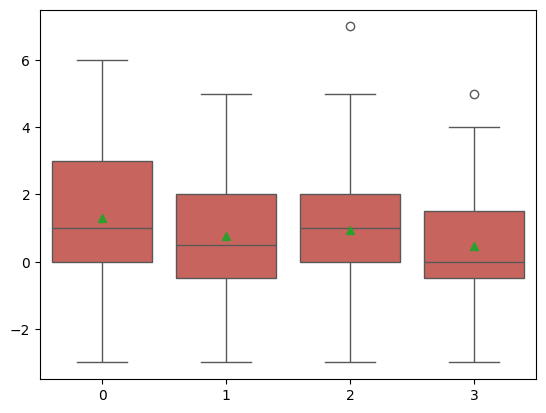

In [117]:
plot_n_boxplots([combined_results[:, 1, 0, 1, 0, 1], combined_results[:, 1, 1, 1, 0, 1], combined_results[:, 1, 0, 1, 1, 1], combined_results[:, 1, 1, 1, 1, 1]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Quasi median?

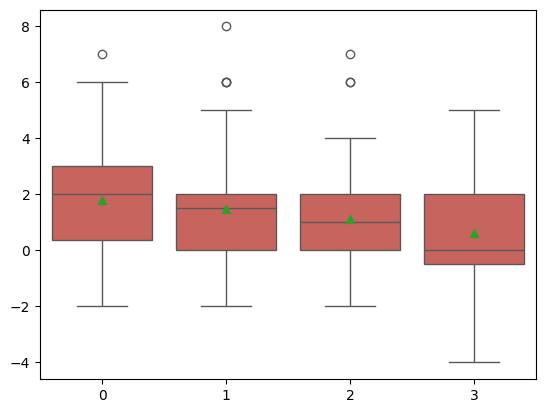

In [118]:
plot_n_boxplots([combined_results[:, 1, 0, 0, 0, 1], combined_results[:, 1, 1, 0, 0, 1], combined_results[:, 1, 0, 0, 1, 1], combined_results[:, 1, 1, 0, 1, 1]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

peaks median?

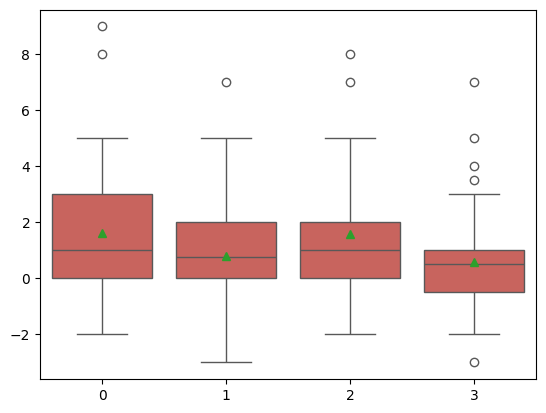

In [119]:
plot_n_boxplots([combined_results[:, 0, 0, 1, 0, 1], combined_results[:, 0, 1, 1, 0, 1], combined_results[:, 0, 0, 1, 1, 1], combined_results[:, 0, 1, 1, 1, 1]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

More stats for the best one.

In [120]:
print(combined_results[:, 0, 0, 0, 0, 1].flatten())

[ 2.  -1.   0.  -3.   6.   2.   1.   2.   0.   2.   2.   5.  -2.   5.
  1.   1.   4.   4.   4.   4.   0.   4.   4.   4.   1.  -3.   3.   1.
  1.   6.   2.   5.   1.   0.   2.   2.   5.   6.   2.   2.   1.   0.
  2.   3.   0.   1.   4.   2.   1.   2.5  1.   6.   0.   2.5  1.5  1.5
  2.  -0.5  3.  -0.5  0.5  4.5  1.  -0.5]


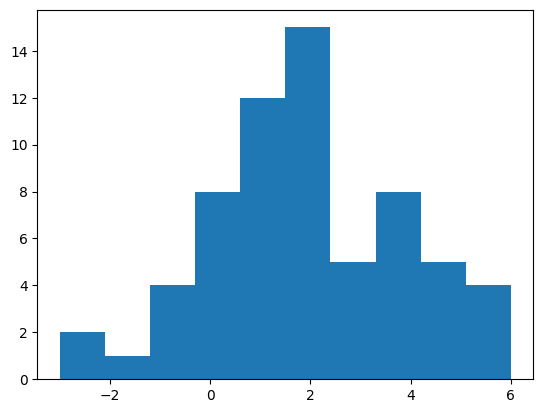

In [121]:
plt.hist(combined_results[:, 0, 0, 0, 0, 1])
plt.show()

In [123]:
t_statistic, p_value = stats.ttest_1samp(a=combined_results[:, 0, 0, 0, 0, 1], popmean=0) 
print(t_statistic , p_value)

7.465908305002926 3.0686603552457087e-10


Investigating the statisitcs of itteration maximazing the average number of biological components.

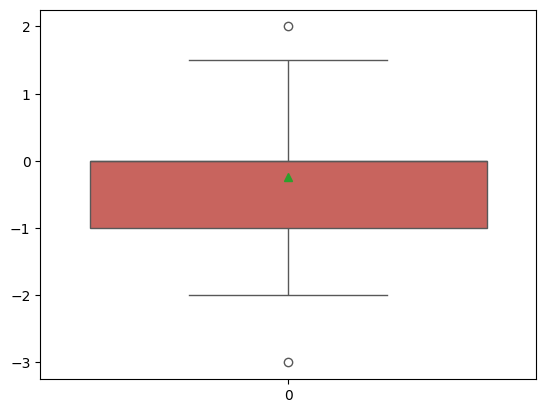

In [126]:
plot_n_boxplots([combined_results[:, 1, 0, 1, 3, 2].flatten()], [sns.xkcd_rgb["pale red"]])

This one for n_brain

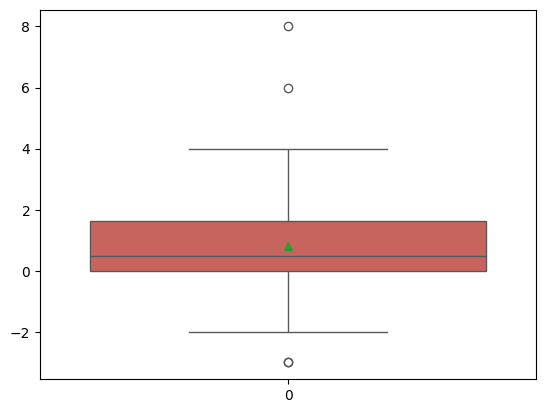

In [127]:
plot_n_boxplots([combined_results[:, 1, 0, 1, 3, 1].flatten()], [sns.xkcd_rgb["pale red"]])

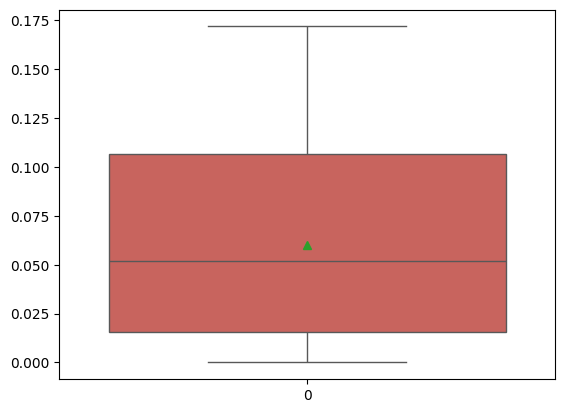

In [130]:
plot_n_boxplots([combined_results[:, 1, 0, 1, 3, 0].flatten()], [sns.xkcd_rgb["pale red"]])

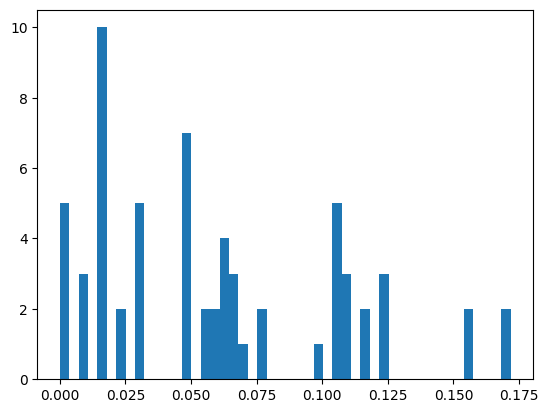

In [128]:
plt.hist(combined_results[:, 1, 0, 1, 3, 0].flatten(), bins=48)
plt.show()

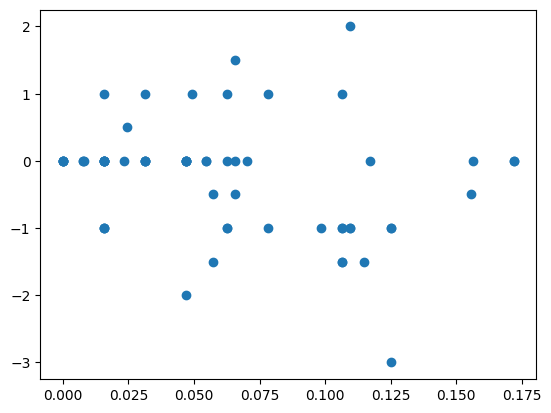

In [129]:
plt.scatter(combined_results[:, 1, 0, 1, 3, 0], combined_results[:, 1, 0, 1, 3, 2])
plt.show()

The one that maximises median

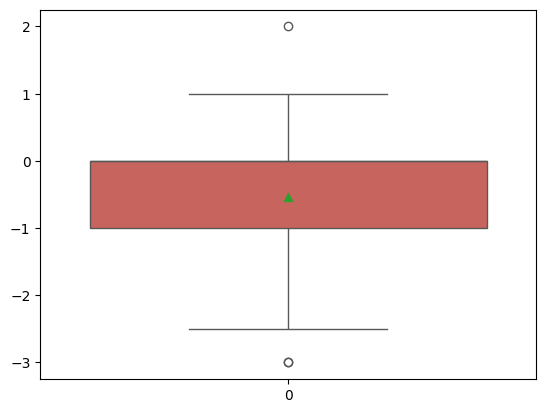

In [133]:
plot_n_boxplots([combined_results[:, 0, 0, 1, 2, 2].flatten()], [sns.xkcd_rgb["pale red"]])

useless

Compared to the other thresholds

In [ ]:
print(np.mean([combined_results[:, 1, 0, 1, 3, 2],))

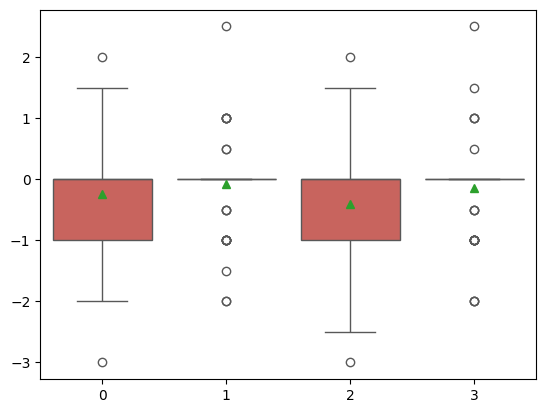

In [136]:
plot_n_boxplots([combined_results[:, 1, 0, 1, 3, 2], combined_results[:, 1, 1, 1, 3, 2], combined_results[:, 1, 0, 1, 2, 2], combined_results[:, 1, 1, 1, 2, 2]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

all median?

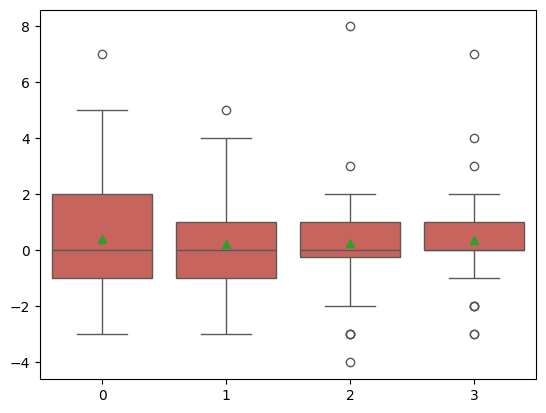

In [86]:
plot_n_boxplots([combined_results[:, 1, 0, 1, 0, 2], combined_results[:, 1, 1, 1, 0, 2], combined_results[:, 1, 0, 1, 1, 2], combined_results[:, 1, 1, 1, 1, 2]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

No bueno
all mean?

More stats for the best one.

In [89]:
print(combined_results[:, 0, 0, 0, 0, 2].flatten())

[-3. -3. -2. -3.  3.  3.  2.  2. -1.  1. -3.  6. -3.  4.  0.  0.  3.  5.
  5.  0.  1.  2.  4.  5.  0. -2. -1. -2.  2.  6.  4.  5.  0.  1.  1.  1.
 -1.  4.  2.  1.  2. -2.  1.  2. -2. -2.  5. -1.]


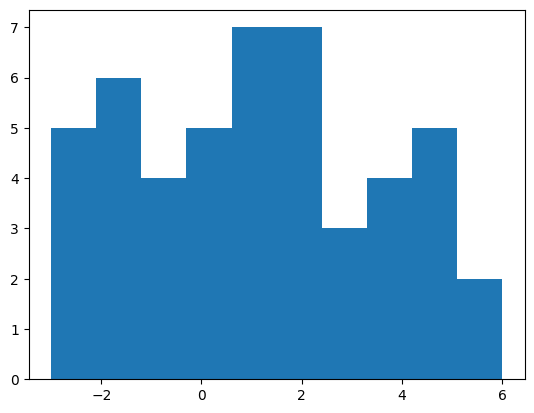

In [92]:
plt.hist(combined_results[:, 0, 0, 0, 0, 2])
plt.show()

In [93]:
t_statistic, p_value = stats.ttest_1samp(a=combined_results[:, 0, 0, 0, 0, 2], popmean=0) 
print(t_statistic , p_value)

2.791934268173548 0.00755180889926576


best from each con of distributions

Best mean

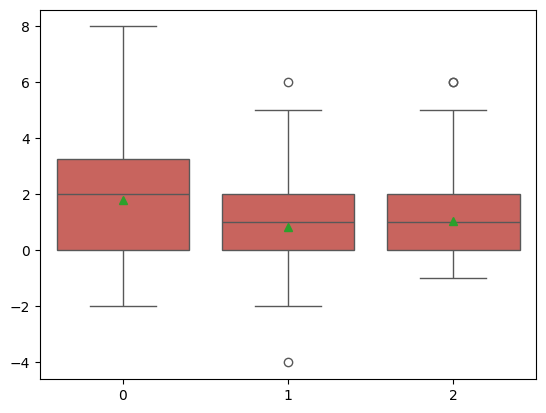

In [94]:
plot_n_boxplots([combined_results[:, 0, 0, 1, 0, 1], peak_results[:, 0, 0, 1], quasi_results[:, 0, 0, 1]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

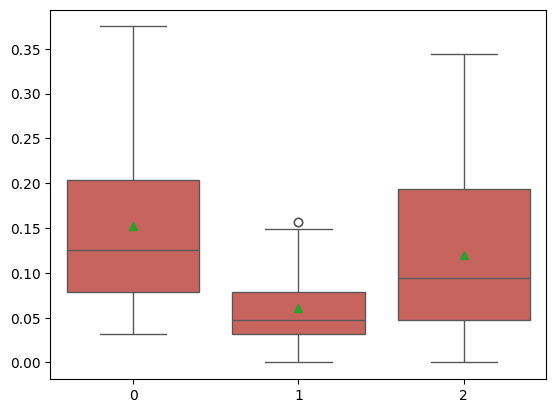

In [96]:
# discarded
plot_n_boxplots([combined_results[:, 0, 0, 1, 0, 0], peak_results[:, 0, 0, 0], quasi_results[:, 0, 0, 0]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Best biocomp

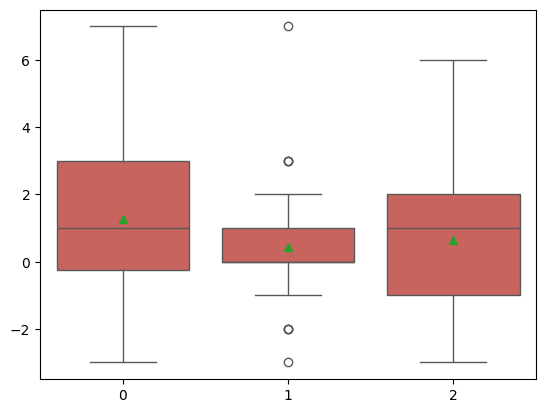

In [115]:
plot_n_boxplots([combined_results[:, 0, 0, 1, 0, 2], peak_results[:, 1, 1, 2], quasi_results[:, 0, 0, 2]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

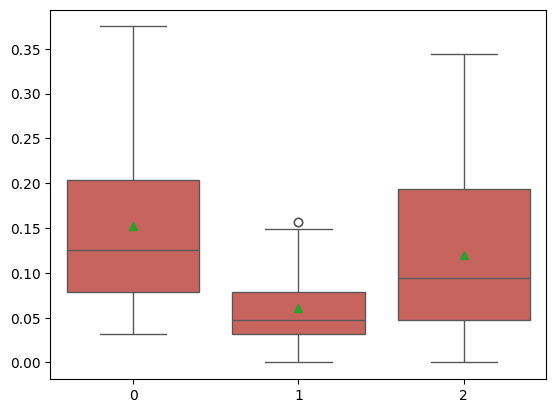

In [116]:
#Discarded
plot_n_boxplots([combined_results[:, 0, 0, 1, 0, 0], peak_results[:, 0, 0, 0], quasi_results[:, 0, 0, 0]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])